# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs:
- Name 
- E-mail 
- Country
- Time on Facebook
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

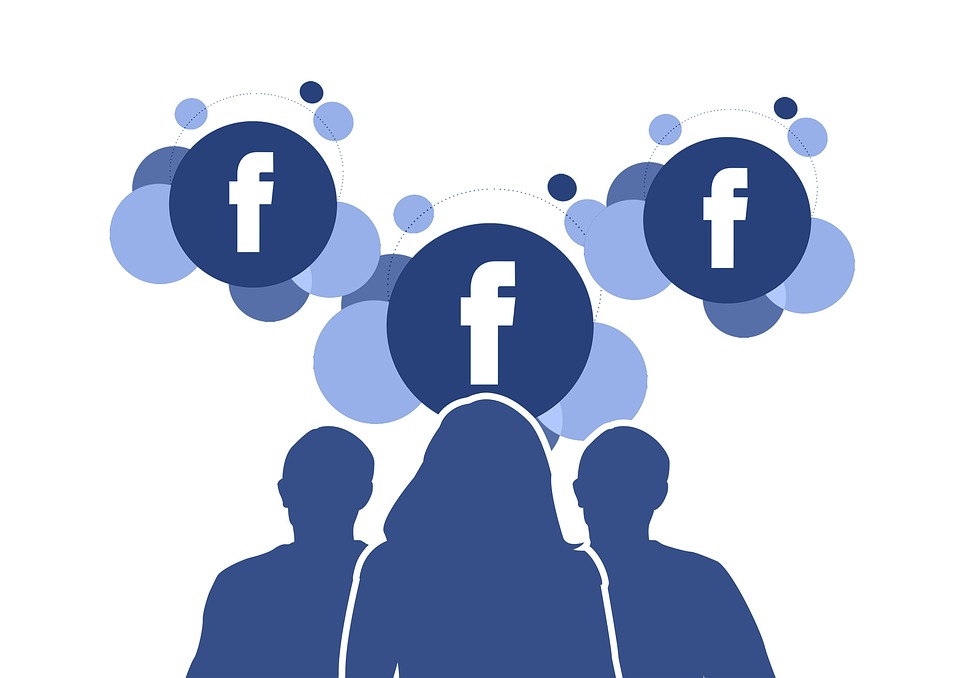

# STEP #0: LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from summarytools import dfSummary
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
sns.set_theme()

# STEP #1: IMPORT DATASET

In [7]:
df = pd.read_csv('dataset/Facebook_Ads_2.csv', delimiter=',', encoding = 'windows-1250')

In [8]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [10]:
df.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


# STEP #2: EXPLORE/VISUALIZE DATASET

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [12]:
df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


# With skim, we see more descriptive statistics than just .info and .describe. We also see over here that there are no empty values.

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 499    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Time Spent on Site    │   0 │     0 │  32.92 │   9.103 │   5 │  26.43 │   33.2 │  39.11 │      60 │ ▁▃▇▇▃▁ │  │
│ │ Salary                │   0 │     0 │  52900 │   18990 │  20 │  38890 │  52840 │  65840 │  100000 │ ▁▃▇▇▅▁ │  │
│ │ Clicked               │   0 │     0 │  0.501 │  0.5005 │   0 │      0 │      1 │      1 │       1 │ ▇    ▇ │  │
│ └───────────────────────┴─────┴───────┴────────┴─────────┴─────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Names                     │       0 │          0 │                          2.2 │                     1098 │  │
│ │ emails                    │       0 │          0 │                            1 │                      499 │  │
│ │ Country                   │       0 │          0 │                          1.5 │                      747 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# dfSummary is also one of my favourites which complements skim and tell me more information like for example how much percentage of each value is in the dataset

In [14]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Names[object],"1. Seth2. Walter3. Martina Avila4. Sexton, Shaeleigh H.5. Holloway, Brennan Q.6. Morales, Halla M.7. Dudley, Ryder M.8. Brady, Oscar Y.9. Levy, Irma P.10. Hudson, Maxwell F.11. other",2 (0.4%)2 (0.4%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)487 (97.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADnUlEQVR4nO3cMW4bVxhG0X8EQrGaIQgCWkKyBy3Ci/UiuIjsQRA0ReSoYQpHQBK4M3wHYM6pNN0rLvRIYT4t1+t1oHC39wH4/xAbGbGRERsZsZERGxmxkREbGbGRWWbmYWbmer2+7XwWbtzhfD5/nplZluWL4PiZ7tZ1Pa3repqZ+70Pw23zmY2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBy2bXv5++f3XU/CzbNBILP4l1lU/GYjY11FxrqKjD99kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh47VwMgYvZHxmI3O3LMtvy7J82vsg3L67mfl1Zn7Z+yDcPtcoGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZu5n5fWb+3Psg3D4bBDKuUTJiIyM2MtZVZKyryLhGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i4xolIzYyBi9kDF7IuEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjGiUjNjIGL2QMXsi4RsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMq5RMmIjY11FxrqKjGuUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyrlEyYiNj8ELG4IWMa5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuUTJiIyM2MtZVZKyryLhGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i4xolIzYyBi9kDF7IuEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjGiWzzMzDzNzvfRBu0vv1en37eDicz+fP67qe9jwRt2nbtpdlWb58BHdY1/X09PT0djwev+59OG7H6+vrp8vlcnp+fr6fmW+xzcwcj8evj4+Pf+x6Om7Rwz8ffEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5j59jrI3gfhtnyvqcO2bS+Xy+U0/3kdBH7Utm0vM/P+8ey1cH6mf70Wbl1FxhcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwE0b46I3qTEmQAAAABJRU5ErkJggg=="">",0(0.0%)
2,emails[object],1. cubilia.Curae.Phasellus@quisac2. Cras.convallis.convallis@Fusce3. nunc.sed.pede@Quisqueporttitor4. Cras.eu@vitaevelitegestas.net5. fringilla.purus.mauris@risusat6. elit.elit.fermentum@erosturpis7. sed@sedtortor.co.uk8. erat@urnaUttincidunt.com9. lacus.varius@sitamet.ca10. metus.eu.erat@non.org11. other,1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)489 (98.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
3,Country[object],1. Israel2. Mauritania3. Bolivia4. Greenland5. Saint Barthélemy6. Guinea7. Iraq8. Samoa9. Liechtenstein10. Bhutan11. other,6 (1.2%)6 (1.2%)6 (1.2%)5 (1.0%)5 (1.0%)5 (1.0%)5 (1.0%)5 (1.0%)5 (1.0%)5 (1.0%)446 (89.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQB

In [27]:
Percentage_Clicked = (len(df[df['Clicked'] == 1]) / len(df)) * 100
Not_Percentage_Clicked = (len(df[df['Clicked'] == 1]) / len(df)) * 100
Not_Percentage_Clicked

50.1002004008016

In [28]:
print(f"Total = ", len(df))
print(f"Number of customers who clicked on the AD = ", len(df[df['Clicked'] == 1]))
print(f"Percentage Clicked = ", Percentage_clicked)
print(f'Did not click = ', len(df[df['Clicked'] == 0]))
print(f'Percentage who did NOT click ', Not_Percentage_Clicked)

Total =  499
Number of customers who clicked on the AD =  250
Percentage Clicked =  50.1002004008016
Did not click =  249
Percentage who did NOT click  50.1002004008016


## People who have more salary, spent more time online

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

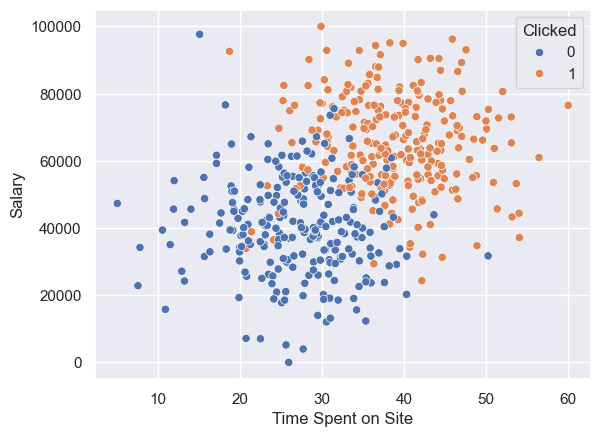

In [38]:
sns.scatterplot(data=df, x= 'Time Spent on Site', y = 'Salary', hue = 'Clicked')

In [31]:
df.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

# The number of people who spent more time online, clicked on more adds which is logical.

<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

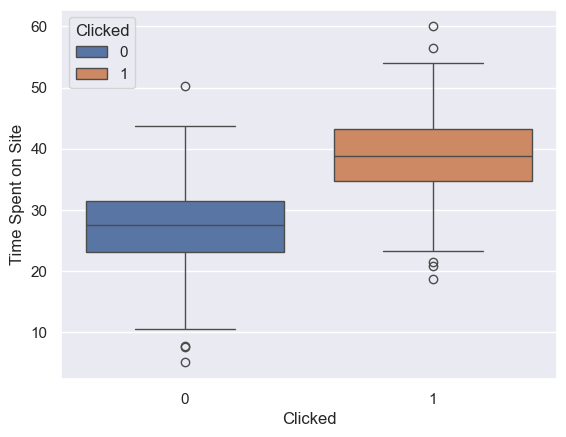

In [37]:
sns.boxplot(data = df, x = 'Clicked', y= 'Time Spent on Site', hue = 'Clicked')

In [40]:
df.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

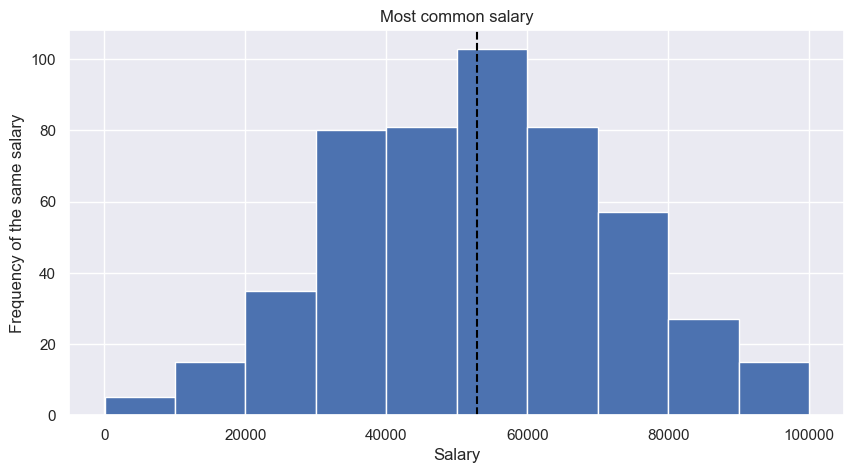

In [54]:
fig, ax = plt.subplots(figsize = (10,5))

hist = ax.hist(x= df['Salary'])
ax.set(title = 'Most common salary', xlabel='Salary', ylabel='Frequency of the same salary')
ax.axvline(df['Salary'].mean(), color = 'Black', linestyle = '--' )
# fig.suptitle('Most common salary', fontsize = 13, horizontalalignment = 'center')

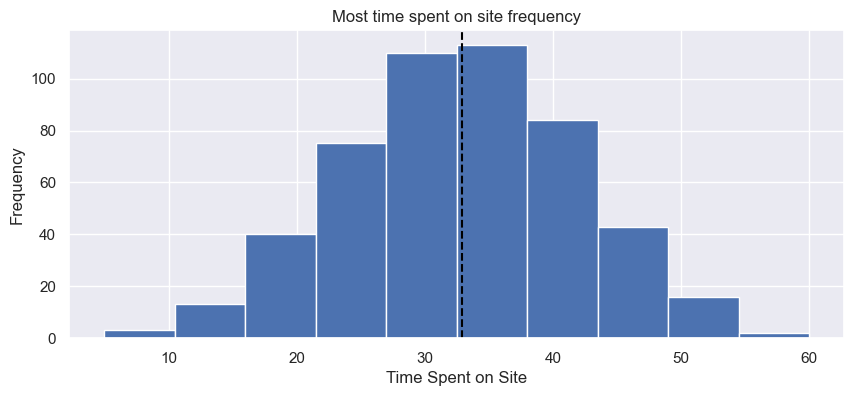

In [58]:
fig, ax = plt.subplots(figsize = (10,4))
hist = ax.hist(data = df, x = 'Time Spent on Site')

ax.set(title='Most time spent on site frequency', xlabel = 'Time Spent on Site', ylabel='Frequency')
ax.axvline(x = df['Time Spent on Site'].mean(), linestyle = '--', color = 'Black')

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [59]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [61]:
#Let's drop the emails, Country and Names (we can make use of the country later!)
cleaned_data = df.drop(labels = ['emails', 'Country', 'Names'], axis = 1)
cleaned_data.head()


,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [63]:
cleaned_data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [68]:
#Let's drop the target coloumn before we do train test split
X = cleaned_data.drop(labels = 'Clicked', axis = 1)
y = cleaned_data['Clicked']

In [ ]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# STEP#4: MODEL TRAINING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
y_test

460    0
73     0
231    1
175    0
237    0
      ..
247    1
384    0
19     0
321    1
331    1
Name: Clicked, Length: 100, dtype: int64

In [77]:
X_test

array([[-0.6008901 , -0.67423765],
       [-0.90294148,  0.27767864],
       [-0.75662831,  1.16045764],
       [-1.38883228, -0.41562641],
       [ 0.38863674, -0.20000695],
       [ 1.4880591 ,  0.92722906],
       [-0.24076455, -0.31018553],
       [-0.60346954, -0.63692266],
       [ 1.12735434, -0.62540056],
       [-0.35547611, -0.62193055],
       [ 0.61173754, -0.44941083],
       [ 0.69608013, -0.547814  ],
       [ 0.50713383,  0.00757085],
       [-0.9225461 , -0.04369856],
       [-1.05140613,  0.39664986],
       [ 0.58562173,  2.22471293],
       [ 0.51302675, -1.535195  ],
       [-0.18398561,  1.22125527],
       [-0.93496962, -0.17062553],
       [-0.99565436, -1.55281483],
       [-0.39718419, -0.77257019],
       [ 1.74550935,  0.14422903],
       [-0.91320113, -0.95809719],
       [-0.71582392,  0.13134965],
       [-0.15414056, -0.9288139 ],
       [-2.31539247, -0.3834927 ],
       [-0.66048671,  0.44920346],
       [ 0.52273019,  0.48167755],
       [-0.71605102,

In [81]:
y_test.array

<NumpyExtensionArray>
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
Length: 100, dtype: int64

In [ ]:
# Fitting Logistic Regression to the Training set
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

# STEP#5: MODEL TESTING

In [88]:
X_test

array([[-0.6008901 , -0.67423765],
       [-0.90294148,  0.27767864],
       [-0.75662831,  1.16045764],
       [-1.38883228, -0.41562641],
       [ 0.38863674, -0.20000695],
       [ 1.4880591 ,  0.92722906],
       [-0.24076455, -0.31018553],
       [-0.60346954, -0.63692266],
       [ 1.12735434, -0.62540056],
       [-0.35547611, -0.62193055],
       [ 0.61173754, -0.44941083],
       [ 0.69608013, -0.547814  ],
       [ 0.50713383,  0.00757085],
       [-0.9225461 , -0.04369856],
       [-1.05140613,  0.39664986],
       [ 0.58562173,  2.22471293],
       [ 0.51302675, -1.535195  ],
       [-0.18398561,  1.22125527],
       [-0.93496962, -0.17062553],
       [-0.99565436, -1.55281483],
       [-0.39718419, -0.77257019],
       [ 1.74550935,  0.14422903],
       [-0.91320113, -0.95809719],
       [-0.71582392,  0.13134965],
       [-0.15414056, -0.9288139 ],
       [-2.31539247, -0.3834927 ],
       [-0.66048671,  0.44920346],
       [ 0.52273019,  0.48167755],
       [-0.71605102,

In [90]:
predicted = clf.predict(X_train)

In [ ]:
clf_report = classification_report(y_train, predicted)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       188
           1       0.91      0.92      0.91       211

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



In [96]:
cm = confusion_matrix(y_true=y_train, y_pred=predicted)
print(cm)

[[168  20]
 [ 17 194]]


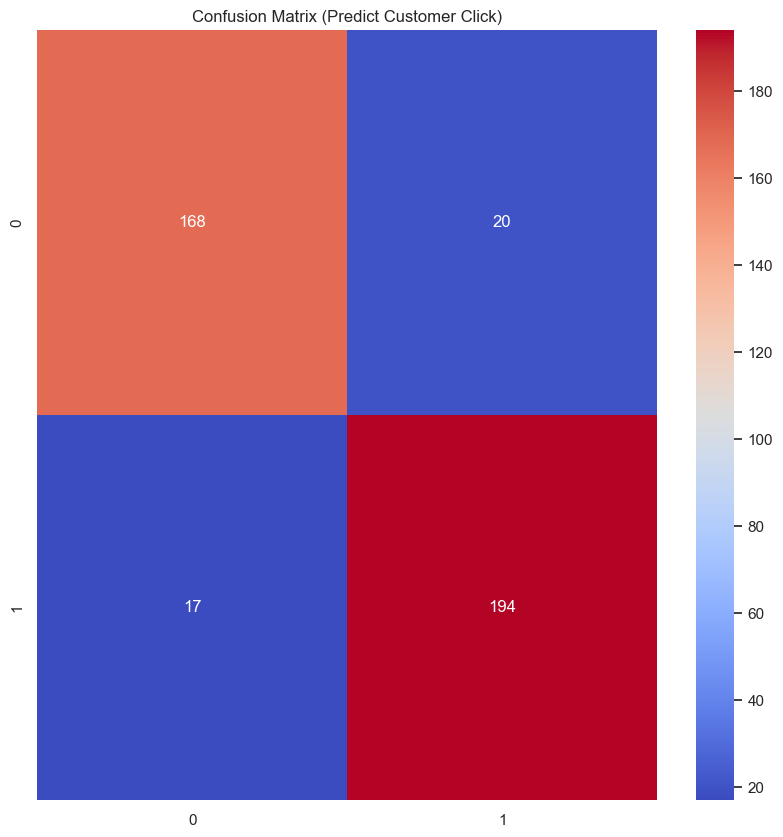

In [114]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data = cm, annot=True, cmap = 'coolwarm', fmt='.0f')
ax.set(title = 'Confusion Matrix (Predict Customer Click)')
plt.show()

In [116]:
y_predict_test = clf.predict(X_test)
y_predict_test

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [134]:
crt = classification_report(y_true=y_test, y_pred=y_predict_test)
print(crt)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



In [119]:
cmt = confusion_matrix(y_true=y_test, y_pred=y_predict_test)
print(cmt)

[[54  7]
 [ 1 38]]


<Axes: >

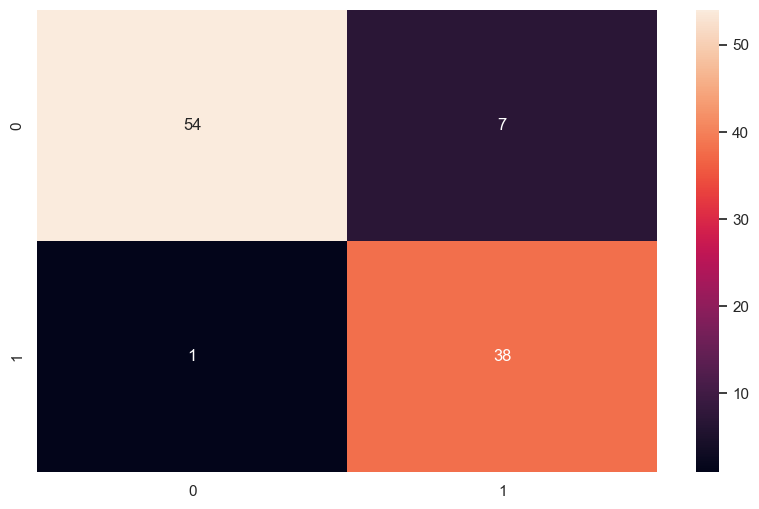

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
# sns.heatmap(data = cm, annot=True, cmap = 'coolwarm', fmt='.0f')

sns.heatmap(cmt, annot=True, fmt = '.0f')
fig.set(title = 'Confusion Matrix (Test data vs Predicted)')


In [139]:
x1 = cleaned_data.drop('Clicked', axis = 1)
y = cleaned_data['Clicked']

In [141]:
import statsmodels.api as sm

x = sm.add_constant(x1)

In [142]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.242189
         Iterations 8


In [143]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Clicked   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.6506
Time:                        21:21:14   Log-Likelihood:                -120.85
converged:                       True   LL-Null:                       -345.88
Covariance Type:            nonrobust   LLR p-value:                 1.871e-98
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.2565      1.530    -10.628      0.000     -19.254     -13.259
Time Spent on Site     0.2876      0.032      9.071      0.000       0.225       0.350
Salary                 0.0001   1.39e-05      9.214      0.000       0.000       0.000
======================================================================================
"""

# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

C:\Users\hassa\AppData\Local\Temp\ipykernel_15432\1213237332.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


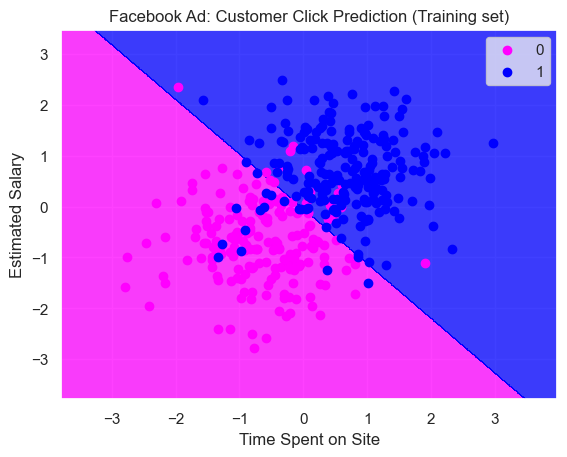

In [ ]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_15432\102605130.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


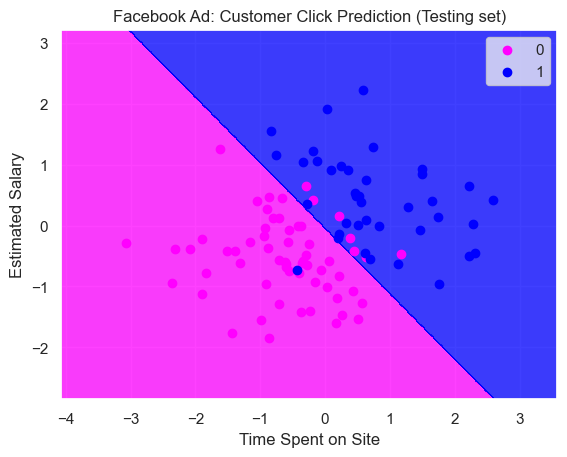

In [123]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()